In [149]:
from sklearn.model_selection import train_test_split, cross_val_score # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPClassifier # Biblioteca para utilização do classificador MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.model_selection import learning_curve # Biblioteca para avaliar um modelo por meio da curva de aprendizagem baseado no tamanho o conjunto de dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, confusion_matrix, classification_report # Biblioteca para avaliação de métricas da execução do classificador
from sklearn import metrics
import seaborn as sns # é uma biblioteca baseada no Matplotlib, que oferece uma interface de alto nível para criação de gráficos estatísticos
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulação de arrays Numpy
from numpy import mean, std
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


▶ **Carregamento e Organização Inicial do Dataset**

In [150]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/bebidas.csv")
print(df)

y = df[['d1', 'd2', 'd3']] # Inclusão da variável que estabelece a classe no vetor de saídas desejadas
df = df.drop(['d1', 'd2', 'd3'], axis=1) # Exclusão da variável que estabelece a classe  das entradas
X = df
print(y)



         x1      x2      x3      x4  d1  d2  d3
0    0.3841  0.2021  0.0000  0.2438   1   0   0
1    0.1765  0.1613  0.3401  0.0843   1   0   0
2    0.3170  0.5786  0.3387  0.4192   0   1   0
3    0.2467  0.0337  0.2699  0.3454   1   0   0
4    0.6102  0.8192  0.4679  0.4762   0   1   0
..      ...     ...     ...     ...  ..  ..  ..
125  0.4155  0.6589  0.5310  0.5404   0   1   0
126  0.3934  0.6244  0.4817  0.4324   0   1   0
127  0.5843  0.8517  0.8576  0.7133   0   0   1
128  0.1995  0.3690  0.3537  0.3462   1   0   0
129  0.3832  0.2321  0.0341  0.2450   1   0   0

[130 rows x 7 columns]
     d1  d2  d3
0     1   0   0
1     1   0   0
2     0   1   0
3     1   0   0
4     0   1   0
..   ..  ..  ..
125   0   1   0
126   0   1   0
127   0   0   1
128   1   0   0
129   1   0   0

[130 rows x 3 columns]


In [151]:
# Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste - usa-se este caso em detrimento da validação cruzada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 12)

▶ **Mapa de correlação entre as variáveis do dataset**

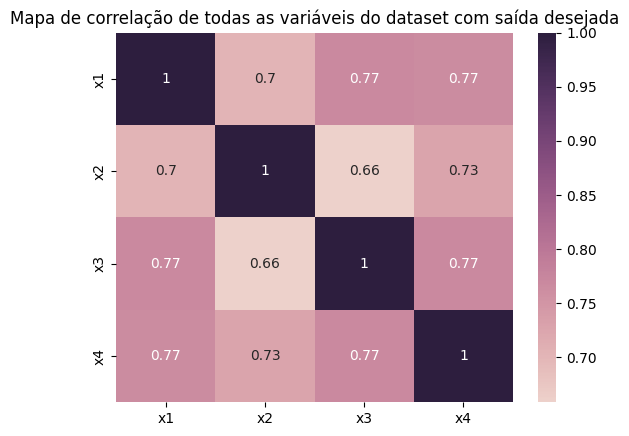

In [152]:
# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset com saída desejada')
ax=ax

▶ **Pré-Processamento dos Dados**

▶ **Aplicação do MLPClassifier** (
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [153]:
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(15), max_iter=5000, epsilon=1e-6, learning_rate_init=0.001)
mlp.fit(X_train, y_train) #FIT = TREINAMENTO

print("Número de saídas da RNA: ", mlp.n_outputs_)
print("Função de ativação da camada de saída da RNA: ",mlp.out_activation_)

Número de saídas da RNA:  3
Função de ativação da camada de saída da RNA:  logistic


▶ **Avaliação do Modelo considerando um percentual fixo de amostras para treinamentos e outro para validação**

Avaliação do modelo
Último Loss:  0.1919647130151707
Número de saídas:  3
Função de ativação camada de saída:  logistic
Número de épocas do treinamento:  4561


MÉTRICAS DA CLASSIFICAÇÃO
Acurácia: 0.8717948717948718
Acurácia balanceada: 0.8386243386243386
Matriz de confusão:
[[17  1  0]
 [ 1 12  1]
 [ 0  2  5]]

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.80      0.86      0.83        14
           2       0.83      0.71      0.77         7

    accuracy                           0.87        39
   macro avg       0.86      0.84      0.85        39
weighted avg       0.87      0.87      0.87        39



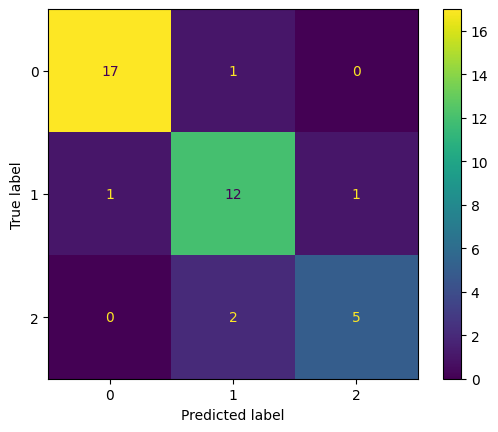

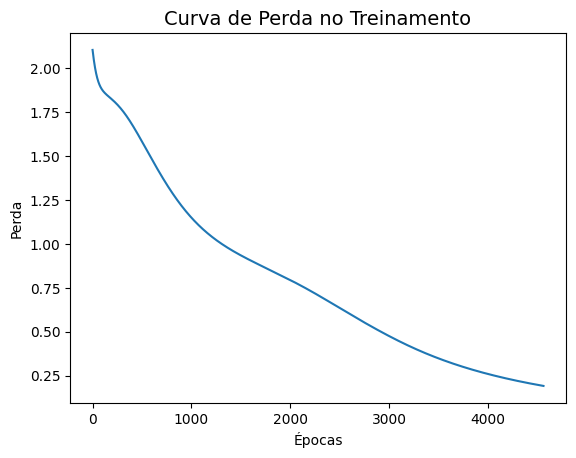

In [154]:
print("Avaliação do modelo")
print("Último Loss: ", mlp.loss_) # último valor
print("Número de saídas: ", mlp.n_outputs_)
print("Função de ativação camada de saída: ", mlp.out_activation_)
print("Número de épocas do treinamento: ", mlp.n_iter_)
print("")


# Fazer a predição
y_pred = mlp.predict(X_test)


y_test_labels = np.argmax(y_test.values, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred

print("\nMÉTRICAS DA CLASSIFICAÇÃO")
print(f"Acurácia: {accuracy_score(y_test_labels, y_pred_labels)}")
print(f"Acurácia balanceada: {balanced_accuracy_score(y_test_labels, y_pred_labels)}")
print(f"Matriz de confusão:\n{confusion_matrix(y_test_labels, y_pred_labels)}")

print("\nRelatório de classificação:")
print(classification_report(y_test_labels, y_pred_labels))

conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
cm_display.plot()
plt.show()


print("")

# Plotando o gráfico de erros no processo de treinamento
plt.plot(mlp.loss_curve_) # Curva Loss
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.show()



▶ **Avaliação do modelo considerando o método de validação cruzada utilizando o conjunto completo de dados e Pipeline para organizar a sequência de operações**

In [158]:
# Criando uma sequência de operações com Pipeline
MLP_pipeline = Pipeline(steps=[
  ("Padronização", StandardScaler()), # Testar com MinMaxScaler e 30 neurônios
  ("MLP", MLPClassifier(activation='logistic', hidden_layer_sizes=(15), max_iter=5000, epsilon=1e-6, learning_rate_init=0.001))
])

# Testando o dataset completo utilizando a validação cruzada
scores_cross_val = cross_val_score(MLP_pipeline, X, y, cv=5)
print("Resultados da validação cruzada do conjunto completo de dados:")
print(scores_cross_val)
print("Média: ", mean(scores_cross_val))
print("Desvio Padrão: ", std(scores_cross_val))

Resultados da validação cruzada do conjunto completo de dados:
[0.92307692 0.84615385 0.96153846 0.92307692 0.96153846]
Média:  0.9230769230769231
Desvio Padrão:  0.042132504423474326


▶ **Sintonizador dos melhores Hiperparâmetros**

In [156]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(5), (10), (15)],
    'max_iter': [5000],
    'activation': ['logistic'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic'],
                         'hidden_layer_sizes': [5, 10, 15],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [5000], 'solver': ['sgd', 'adam']})

In [159]:
print("Melhores valores dos parâmetros do grid: ", grid.best_params_)
print("Parâmetros mais relevantes para estimar: ", grid.best_estimator_)
print("Melhor acurácia: ", grid.best_score_)

Melhores valores dos parâmetros do grid:  {'activation': 'logistic', 'hidden_layer_sizes': 10, 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'adam'}
Parâmetros mais relevantes para estimar:  MLPClassifier(activation='logistic', hidden_layer_sizes=10, max_iter=5000)
Melhor acurácia:  0.923076923076923
